In [1]:
using GLMakie
GLMakie.activate!(inline=true)
using CSV
using DataFrames

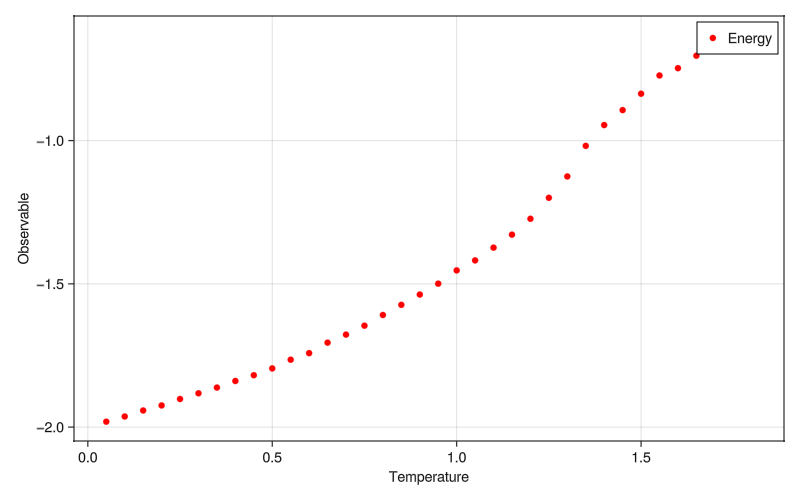

In [3]:
run = 1
L = 50

d2 = CSV.read("./Analysis/run$run/observables.csv", DataFrame)

g = Figure(size = (800, 500))

ax3 = Axis(g[1, 1], xlabel = "Temperature", ylabel = "Observable") # yscale=log10
scatter!(ax3, d2.T, d2.Eps, color = :red, label = "Energy")
# scatter!(ax3, d2.T, d2.Mps, color = :blue, label = "Magnetization")
# lines!(ax3, d2.T, d2.Cv, color = :green, label = "Specific heat")
# lines!(ax3, d2.T, d2.dEdT, color = :purple, label = "dEdT")
# plot!(ax3, d2.T, d2.Chi, color = :black, label = "Mag. Susceptibility")
# scatter!(ax3, d2.T, d2.Yu/L^2, color = :orange, label = "Helicity Modulus")
# plot!(ax3, d2.T, (2/pi)*d2.T)

# ylims!(ax3, 0, 1)
# ylims!(ax3, 1e-6, 1e-1)
axislegend()

g

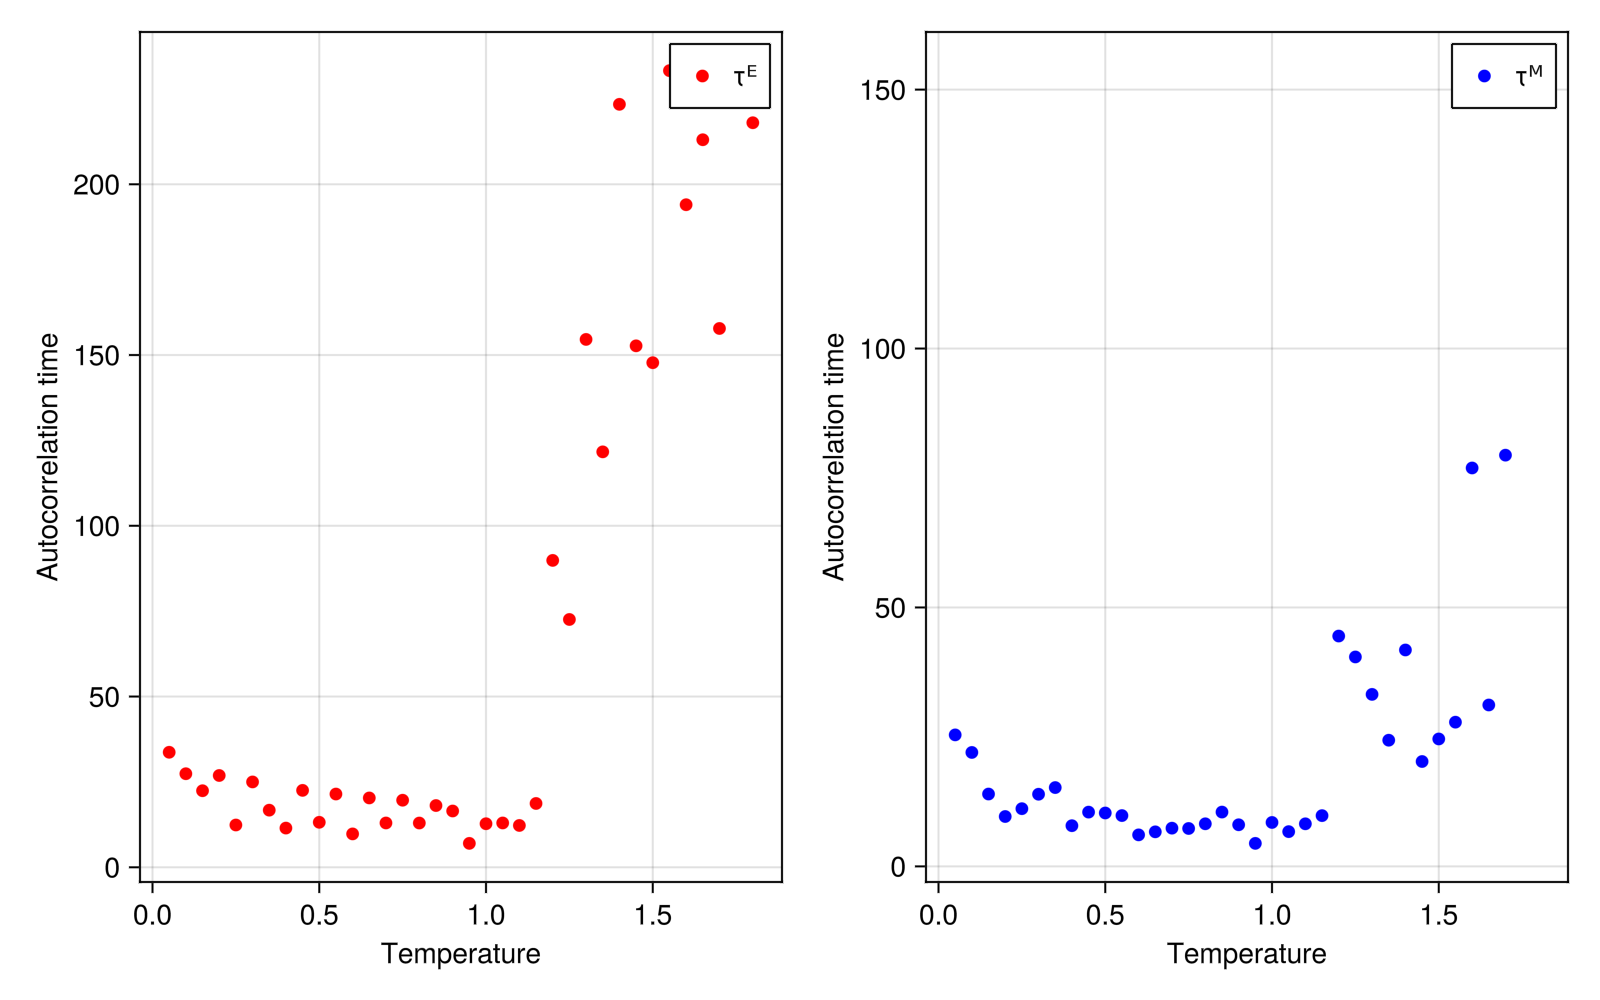

In [31]:
##### direct #####
run = 28

d = CSV.read("./Analysis/run$run/direct-binning/tau-T.csv", DataFrame)

f = Figure(size = (800, 500))

ax1 = Axis(f[1, 1], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax1, d.T, d.taus_E, color = :red, label = "τᴱ")
axislegend()

ax2 = Axis(f[1, 2], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax2, d.T, d.taus_M, color = :blue, label = "τᴹ")
axislegend()

f

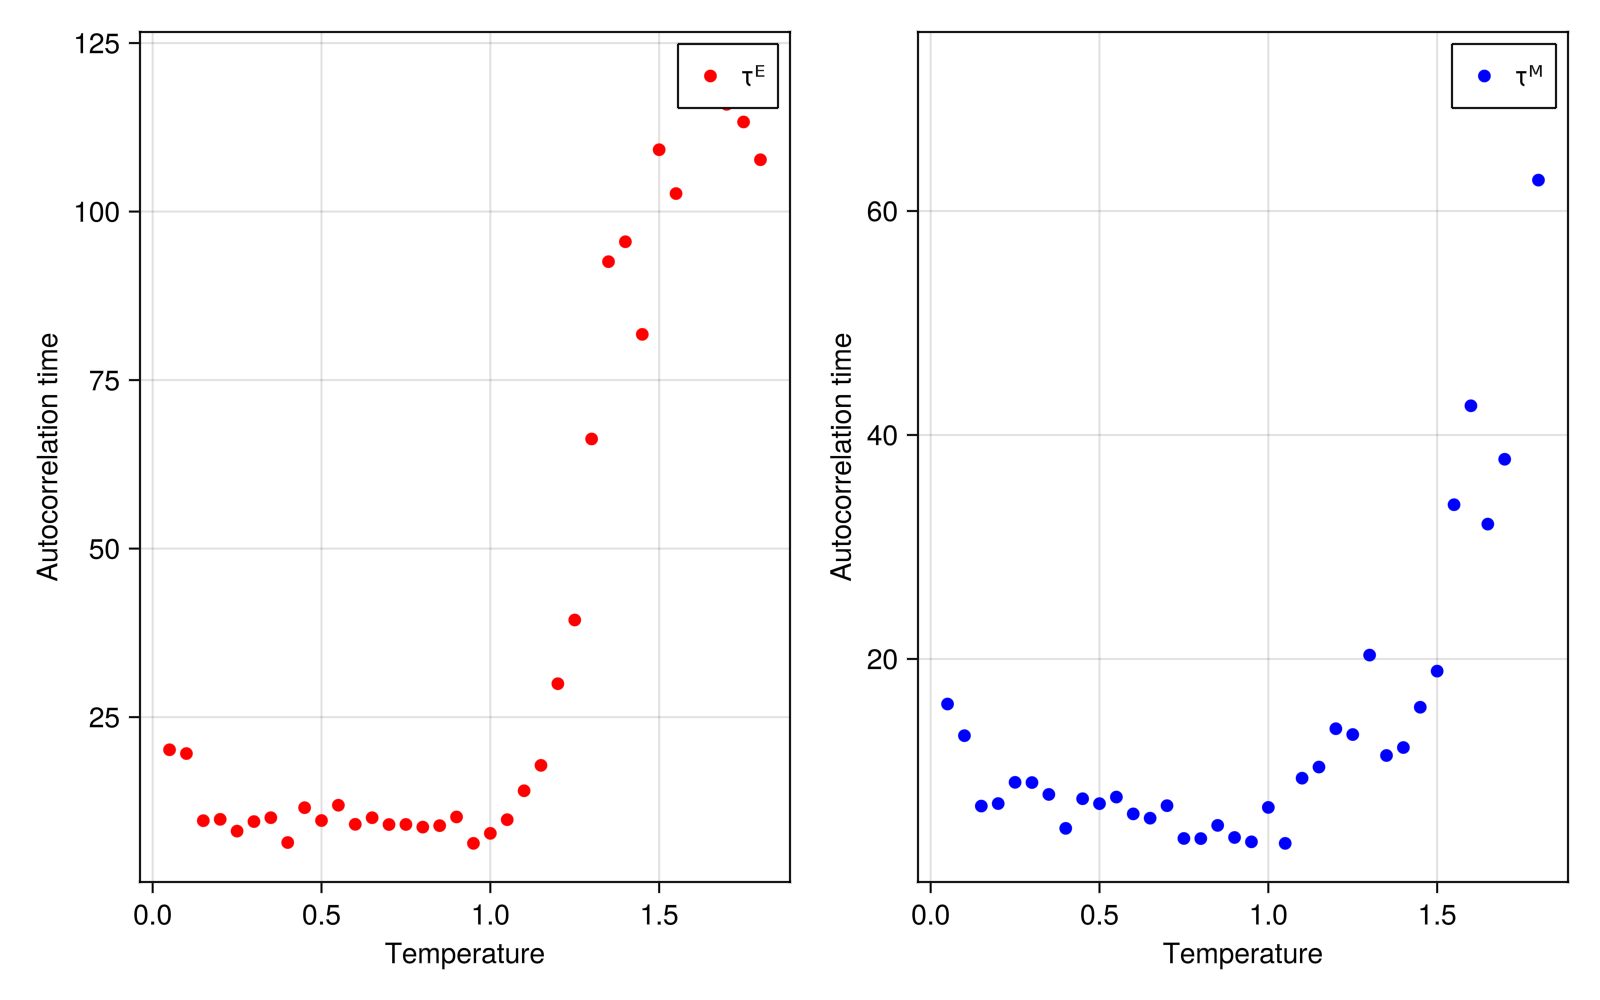

In [32]:
##### full: tau vs temp #####
run = 28

d = CSV.read("./Analysis/run$run/full-binning/tau-T.csv", DataFrame)

f = Figure(size = (800, 500))

ax1 = Axis(f[1, 1], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax1, d.T, d.taus_E, color = :red, label = "τᴱ")
axislegend()

ax2 = Axis(f[1, 2], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax2, d.T, d.taus_M, color = :blue, label = "τᴹ")
axislegend()

f

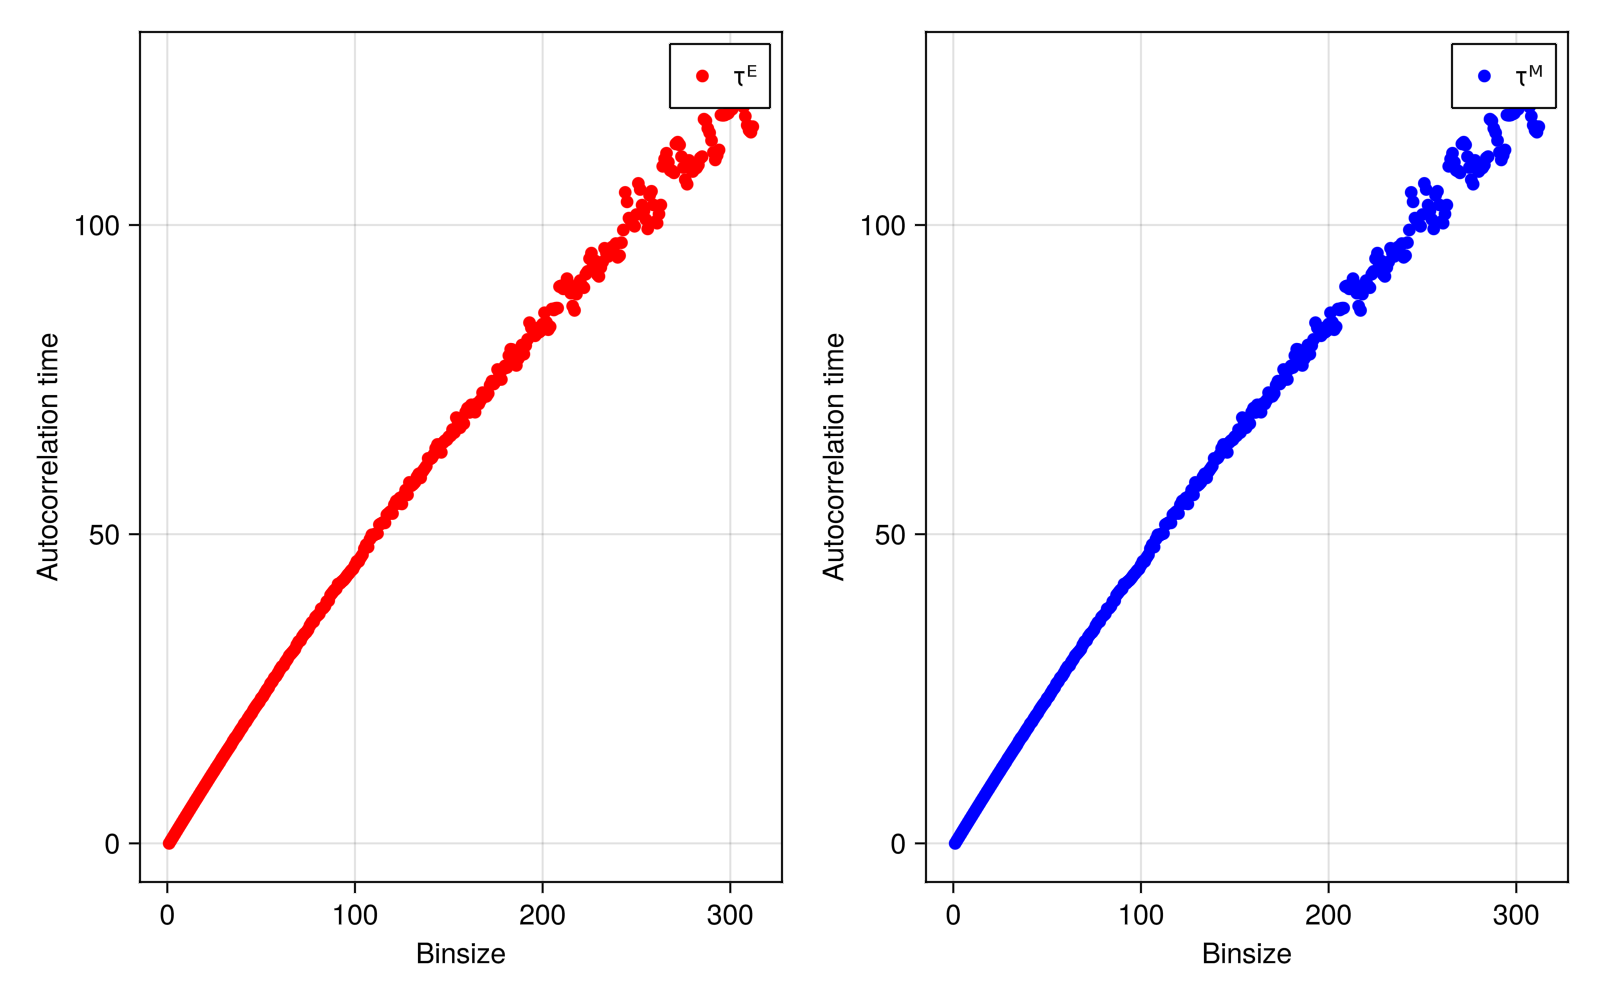

In [34]:
##### full: tau convergence #####
run = 28
T = 1.7

d2 = CSV.read("./Analysis/run$run/full-binning/binsize/$T-tau-binsize.csv", DataFrame)

g = Figure(size = (800, 500))

ax3 = Axis(g[1, 1], xlabel = "Binsize", ylabel = "Autocorrelation time")
scatter!(ax3, d2.binsize, d2.taus_E, color = :red, label = "τᴱ")
axislegend()

ax4 = Axis(g[1, 2], xlabel = "Binsize", ylabel = "Autocorrelation time")
scatter!(ax4, d2.binsize, d2.taus_M, color = :blue, label = "τᴹ")
axislegend()

g

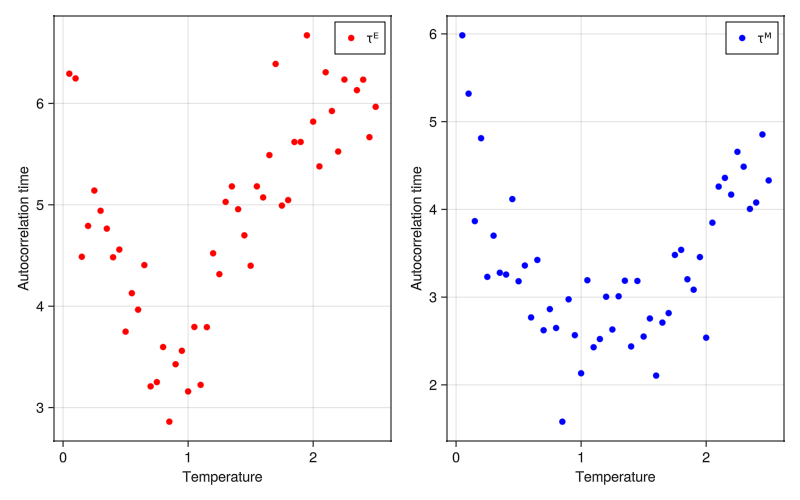

In [2]:
##### log: tau vs temp #####
run = 27

d = CSV.read("/Users/adityachugh/Desktop/Wietek @ MPIPKS/XY2D/Analysis/run27/log-binning/tau-T.csv", DataFrame)

f = Figure(size = (800, 500))

ax1 = Axis(f[1, 1], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax1, d.T, d.taus_E, color = :red, label = "τᴱ")
axislegend()

ax2 = Axis(f[1, 2], xlabel = "Temperature", ylabel = "Autocorrelation time")
scatter!(ax2, d.T, d.taus_M, color = :blue, label = "τᴹ")
axislegend()

f

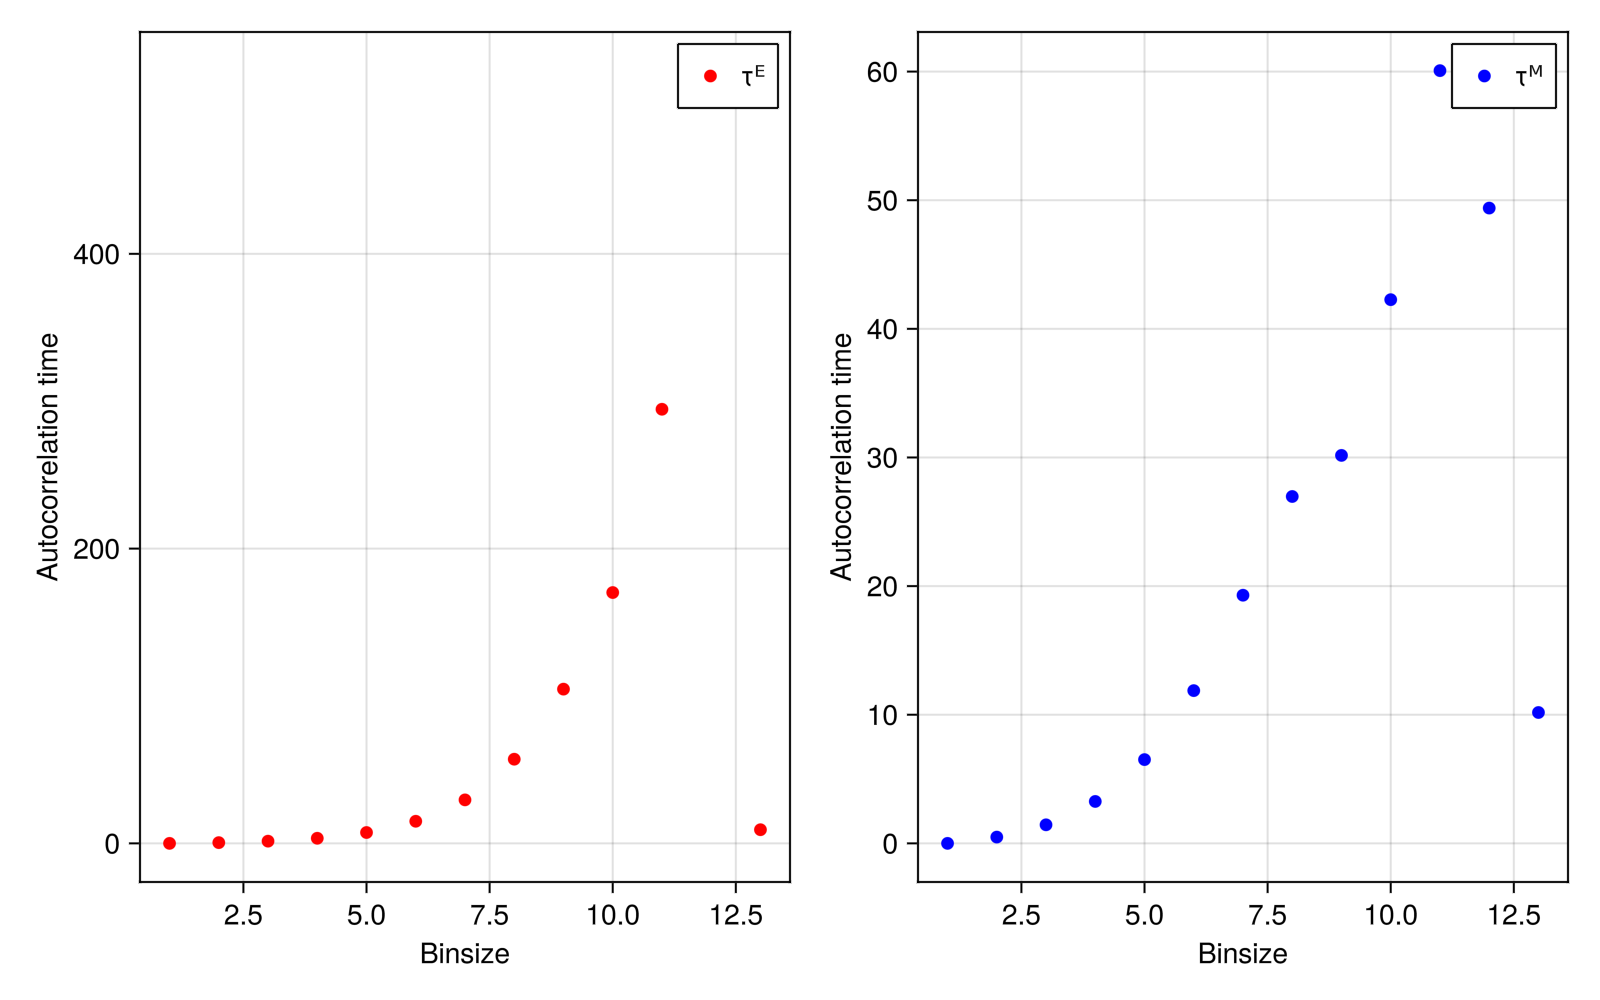

In [39]:
##### log: tau convergence #####
run = 28
T = 1.6

d2 = CSV.read("./Analysis/run$run/log-binning/binsize/$T-tau-binsize.csv", DataFrame)

g = Figure(size = (800, 500))

ax3 = Axis(g[1, 1], xlabel = "Binsize", ylabel = "Autocorrelation time")
scatter!(ax3, d2.binsize, d2.taus_E, color = :red, label = "τᴱ")
axislegend()

ax4 = Axis(g[1, 2], xlabel = "Binsize", ylabel = "Autocorrelation time")
scatter!(ax4, d2.binsize, d2.taus_M, color = :blue, label = "τᴹ")
axislegend()

g

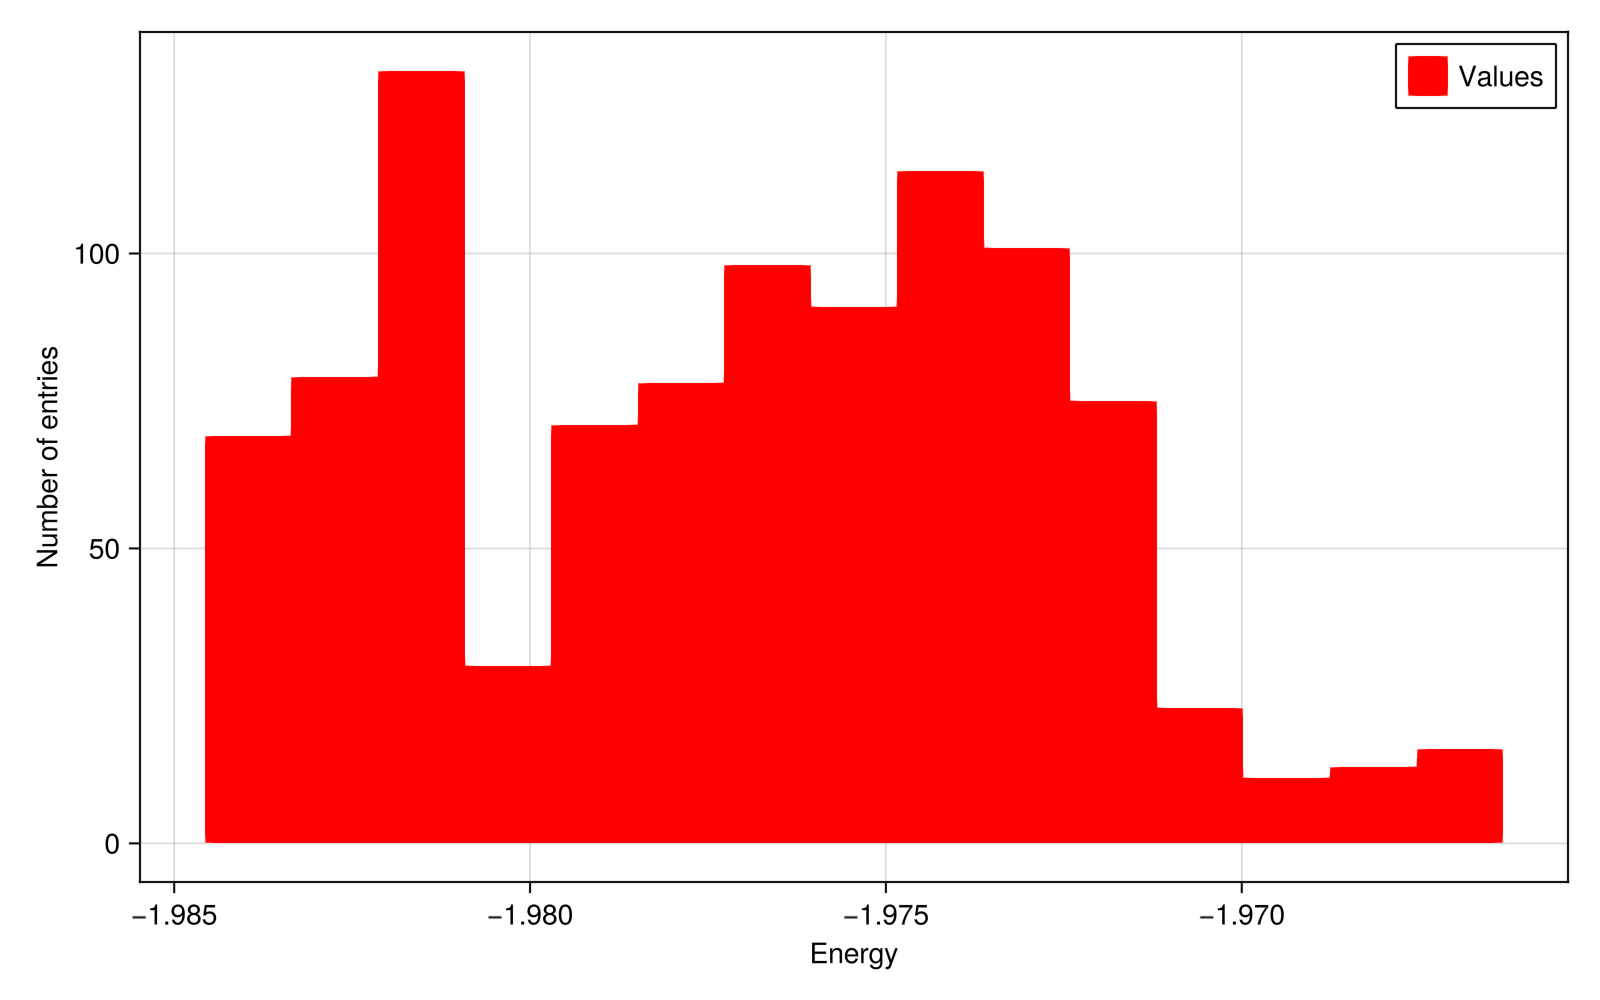

In [38]:
##### boltzmann #####
include("analysis-functions.jl")

run = 27
T = 0.05
L = 10
EQ_NO = 100 * L

energy, magnetization_sq, stiffness_sum_sq = EM_importer("./Data/run$run/meas-$T.h5")
energy = energy[(EQ_NO+1):end]

h = Figure(size = (800, 500))

ax5 = Axis(h[1, 1], xlabel = "Energy", ylabel = "Number of entries")
hist!(ax5, energy/L^2, color = :red, label = "Values")
axislegend()

h